In [102]:
import pandas as pd
from common.outliers import *
from common.clustering import *
from common.standardization import *
import matplotlib

matplotlib.rcParams['figure.figsize'] = [10, 10]

### Load dataset from file
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [103]:
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx", index_col=0)
print(data)

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii             2006   
1                              Super Mario Bros.      NES             1985   
2                                 Mario Kart Wii      Wii             2008   
3                              Wii Sports Resort      Wii             2009   
4                       Pokemon Red/Pokemon Blue       GB             1996   
...                                          ...      ...              ...   
10447  Greg Hastings' Tournament Paintball Max'd      PS2             2006   
10448                                    Deus Ex       PC             2000   
10449                  Monster Rancher Advance 2      GBA             2002   
10450                              Karnaaj Rally      GBA             2003   
10451                Wade Hixton's Counter Punch      GBA             2004   

              Genre  NA_Sales  EU_Sales  JP_Sales  Global_Sales

### Data stats for each column

In [104]:
columns_to_get_stats_from = ["Global_Sales", "User_Score", "Critic_Score",
                             "EU_Sales", "NA_Sales", "JP_Sales", "Year_of_Release"]
stats_to_compute = ["max", "min", "std", "mean", "median"]
columns_stats = data.agg({item: stats_to_compute for item in columns_to_get_stats_from})
print(columns_stats.to_string())

        Global_Sales    User_Score  Critic_Score   EU_Sales   NA_Sales   JP_Sales  Year_of_Release
max        82.530000  9.600000e+00     99.000000  28.960000  41.360000  10.220000      2016.000000
min         0.010000  8.881784e-16     13.000000   0.000000   0.000000   0.000000      1977.000000
std         1.904295  1.302502e+00     12.449705   0.622661   1.002670   0.385861         6.070377
mean        0.810365  7.270068e+00     70.941734   0.225307   0.402908   0.108312      2006.003636
median      0.360000  7.500000e+00     72.400000   0.070000   0.170000   0.000000      2007.000000


### Data standardization

In [105]:
# columns_to_standardize = ["Global_Sales", "User_Score", "Critic_Score", "EU_Sales",
#                           "NA_Sales", "JP_Sales", "Year_of_Release"]
# standardize(data, columns_to_standardize, columns_stats)
# print(data)

### Outliers - 1D

C:\Users\Jarek\.conda\envs\EksploracjaDanych\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Jarek\.conda\envs\EksploracjaDanych\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Jarek\.conda\envs\EksploracjaDanych\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

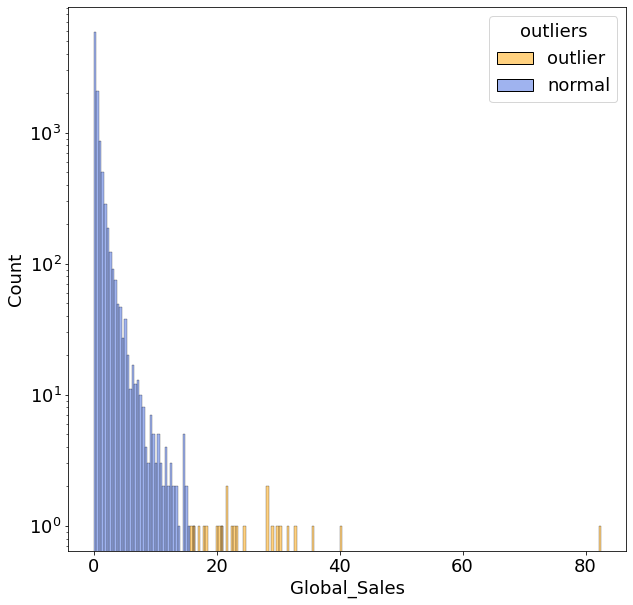

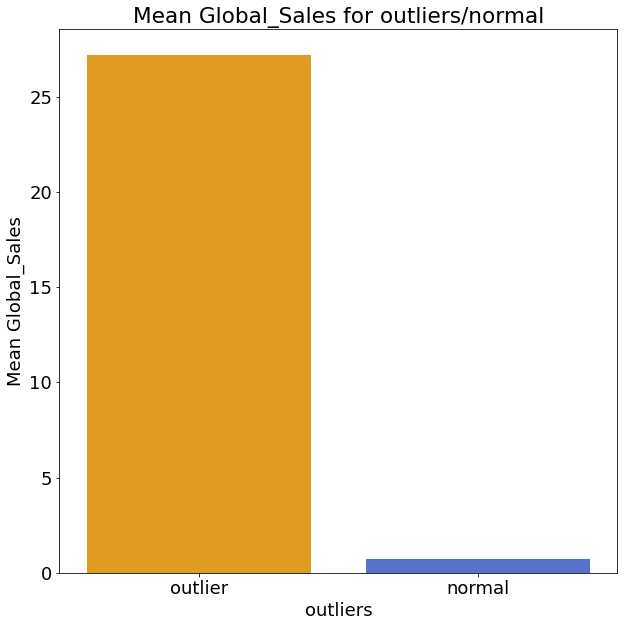

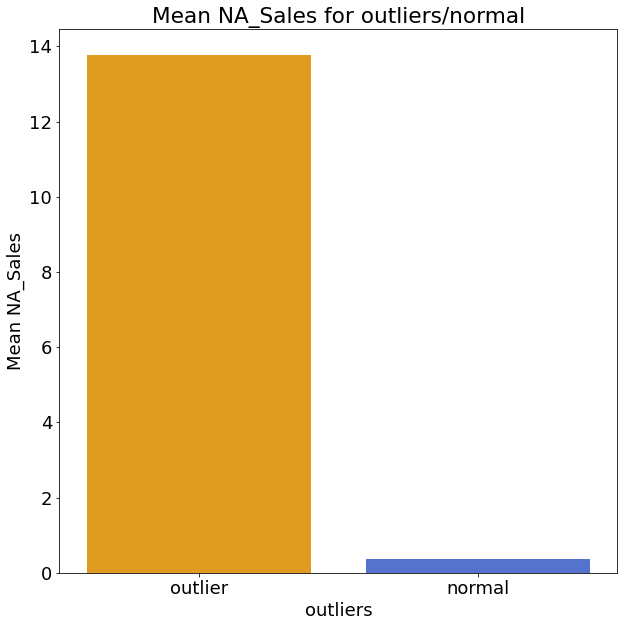

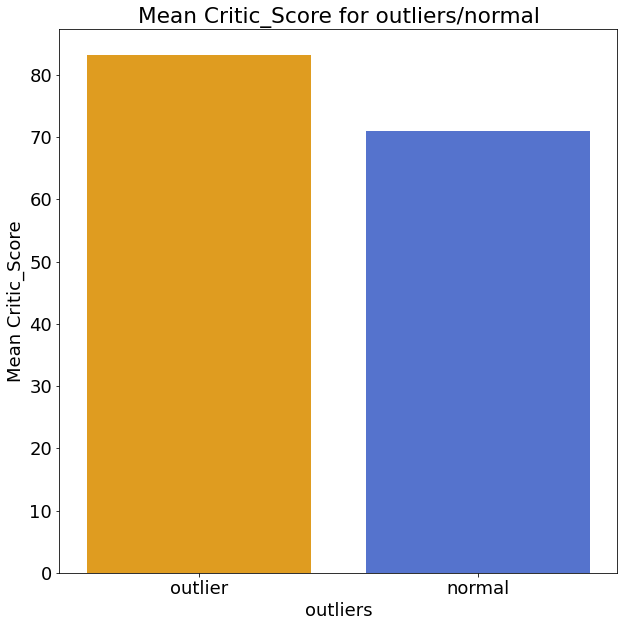

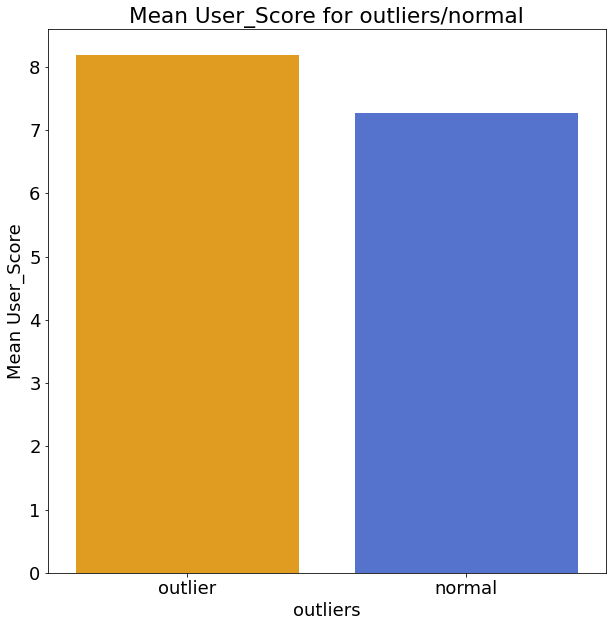

Outliers according to column Global_Sales
Wii Sports: 82.53
Super Mario Bros.: 40.24
Mario Kart Wii: 35.52
Wii Sports Resort: 32.77
Nintendogs: 24.67
Pokemon Red/Pokemon Blue: 31.37
Tetris: 30.26
Pokemon Diamond/Pokemon Pearl: 18.25
Super Mario Bros. 3: 17.28
New Super Mario Bros.: 29.8
Super Mario Land: 18.14
Kinect Adventures!: 21.81
Wii Fit Plus: 21.79
Brain Age: Train Your Brain in Minutes a Day: 20.15
Wii Play: 28.92
Duck Hunt: 28.31
New Super Mario Bros. Wii: 28.32
Mario Kart DS: 23.21
Wii Fit: 22.7
Grand Theft Auto V: 21.04
Super Mario World: 20.61
Grand Theft Auto V: 16.27
Pokemon Ruby/Pokemon Sapphire: 15.85
Pokemon Gold/Pokemon Silver: 23.1

Outliers according to column Critic_Score
Ride to Hell: 12.99999999999999
Leisure Suit Larry: Box Office Bust: 17.0
The Legend of Zelda: Ocarina of Time: 99.0
Self-Defense Training Camp: 21.0
Drake of the 99 Dragons: 22.0
Pac-Man: 93.6
NHL 15: 38.6
All Star Cheer Squad: 50.4
Purr Pals: 50.40000000000001
Mario Kart: Double Dash!!: 92.3
The

<Figure size 720x720 with 0 Axes>

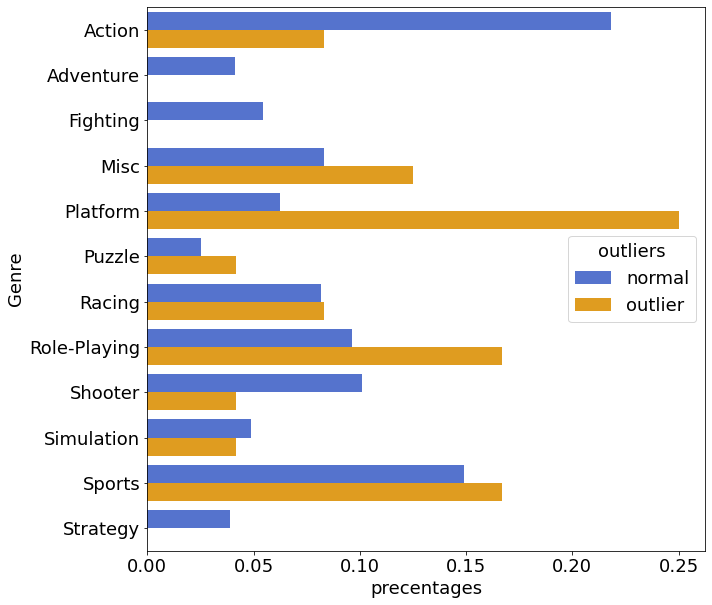

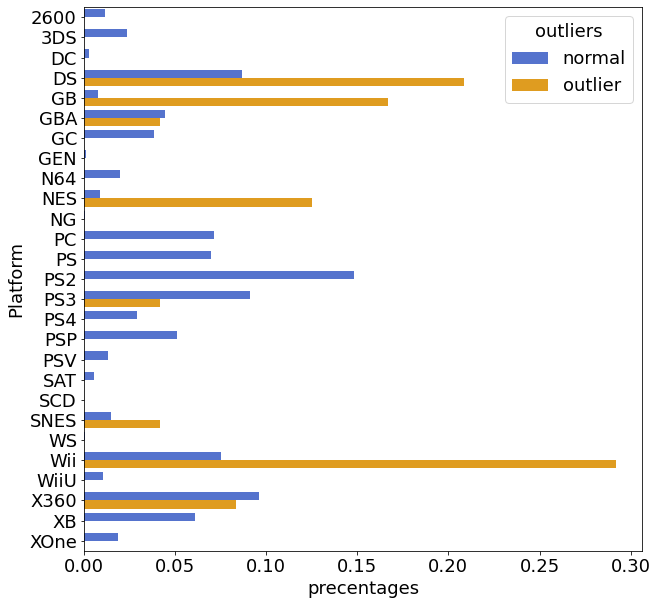

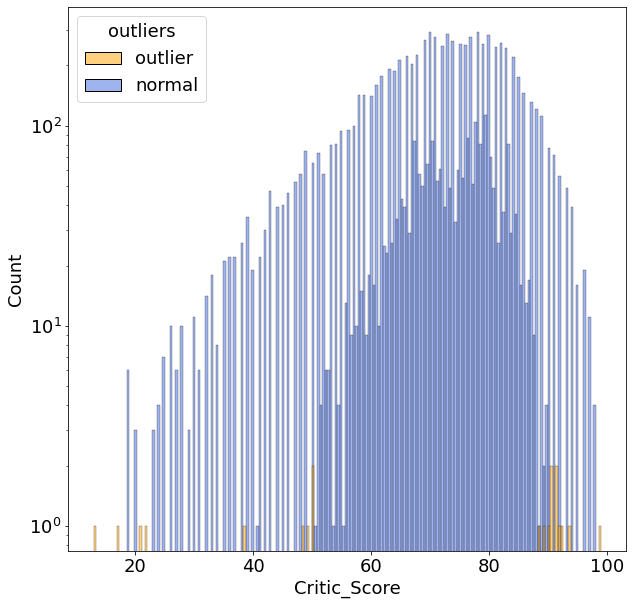

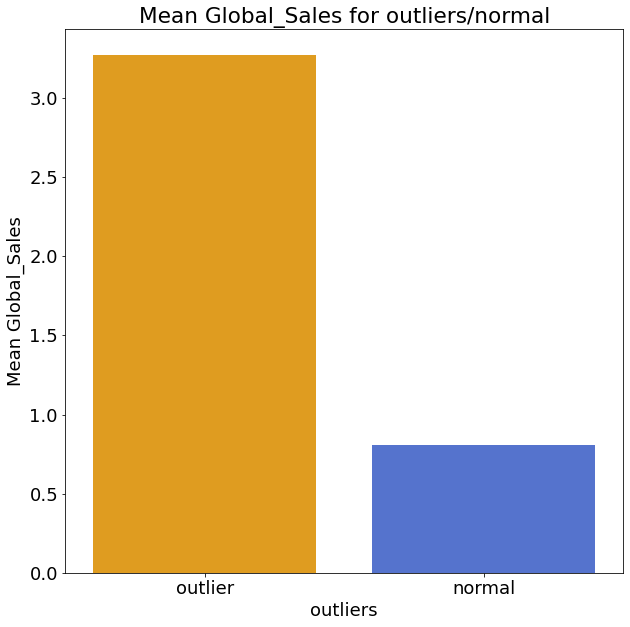

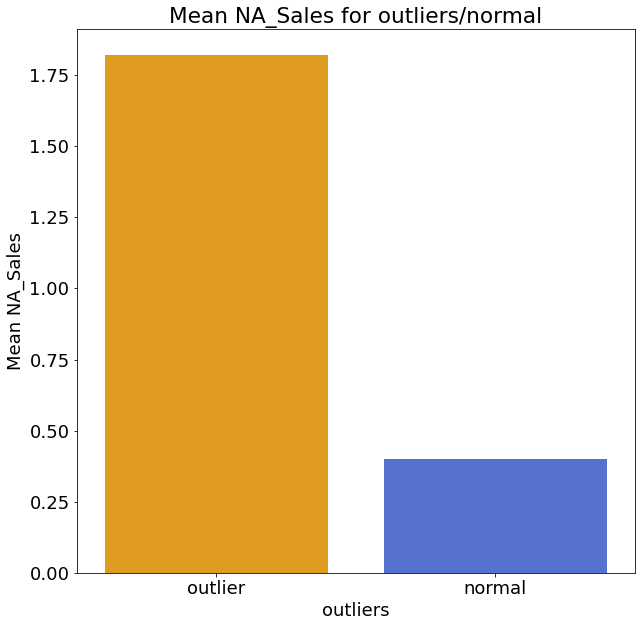

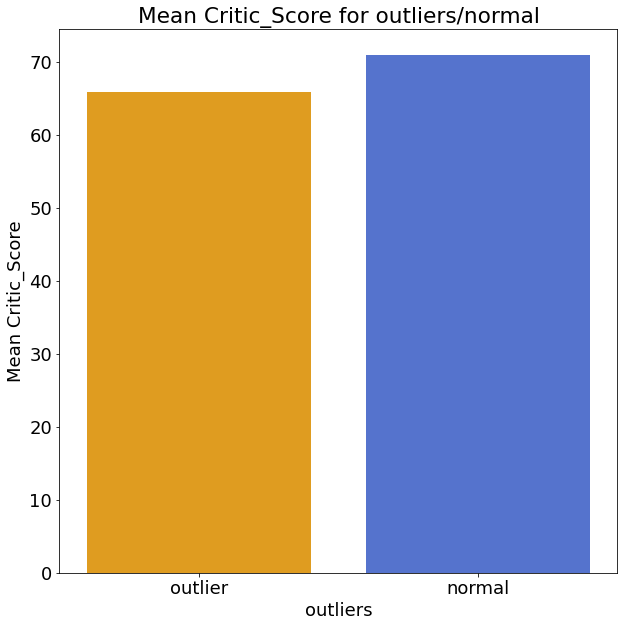

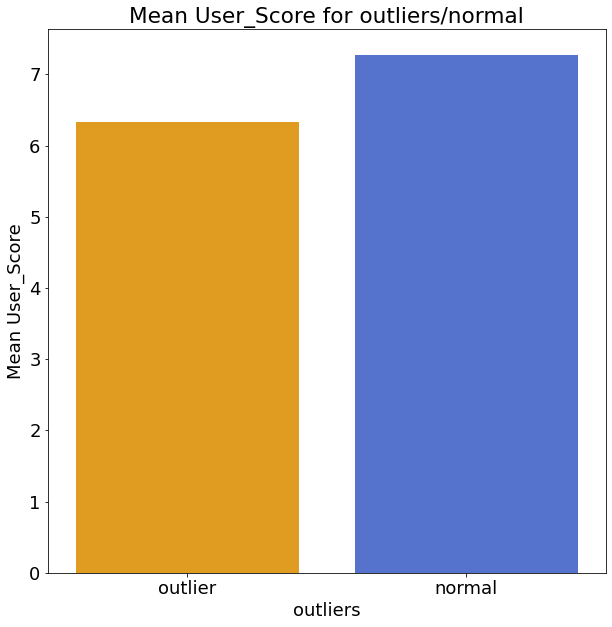

<Figure size 720x720 with 0 Axes>

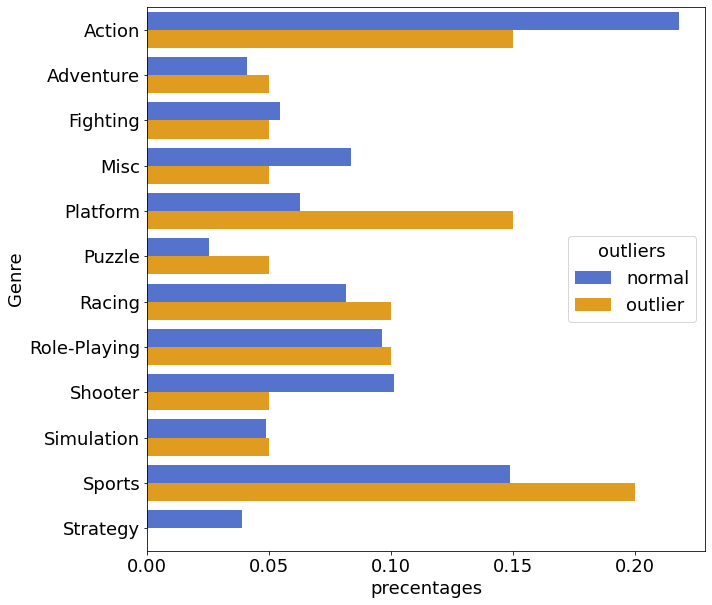

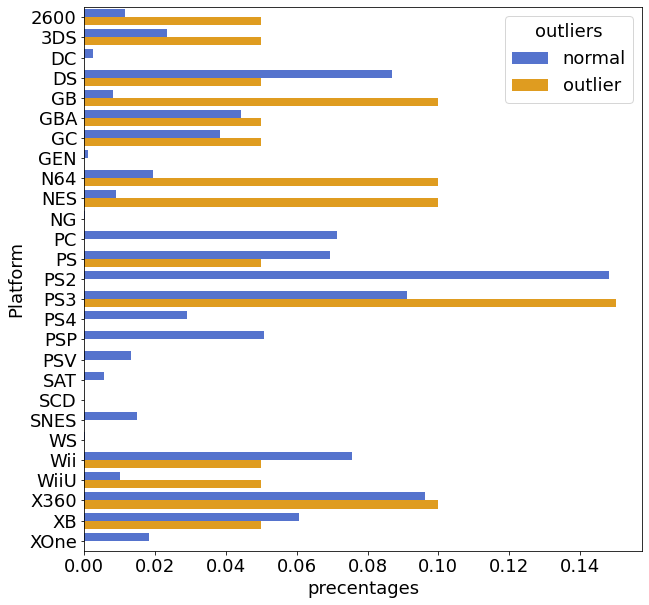

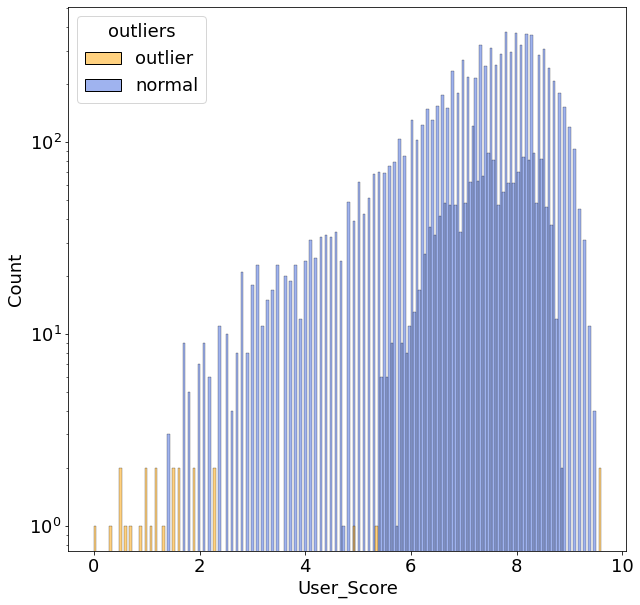

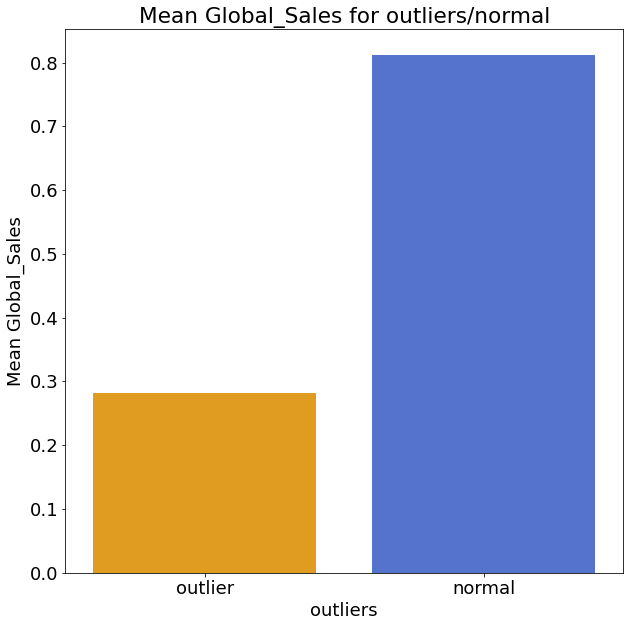

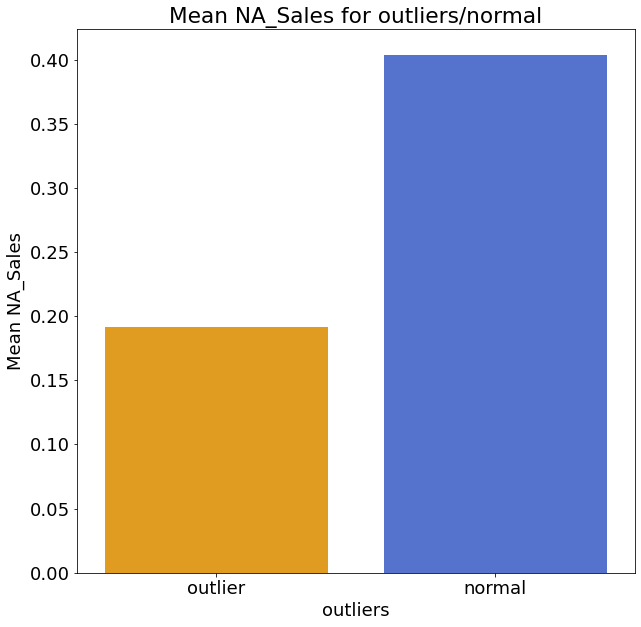

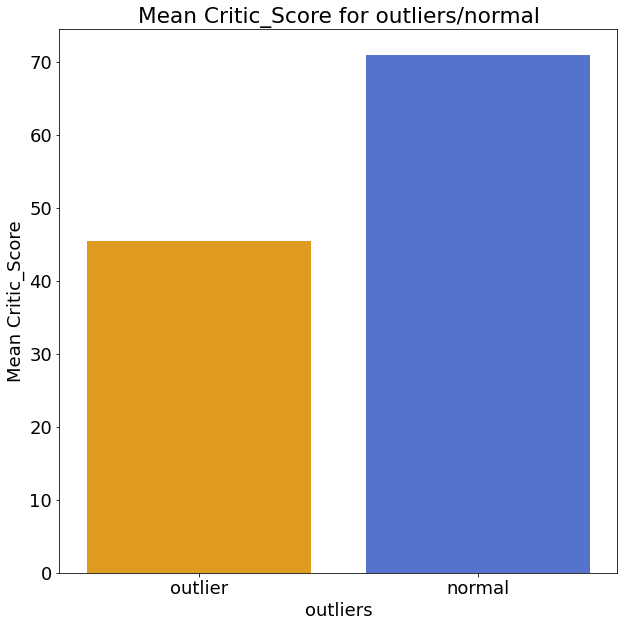

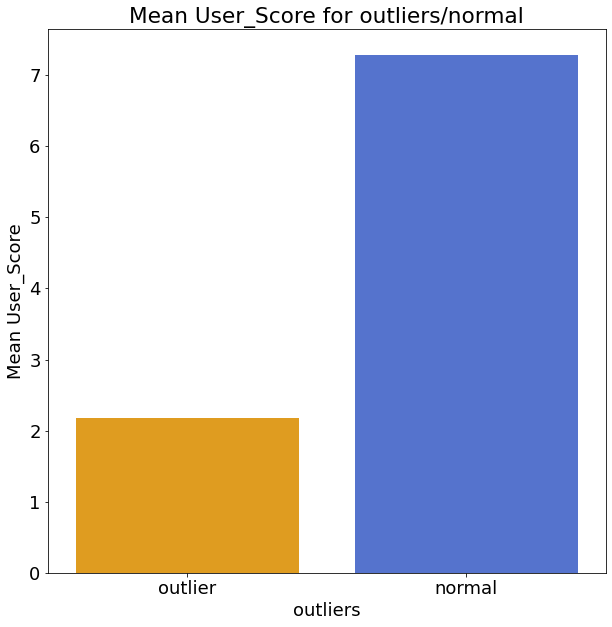

<Figure size 720x720 with 0 Axes>

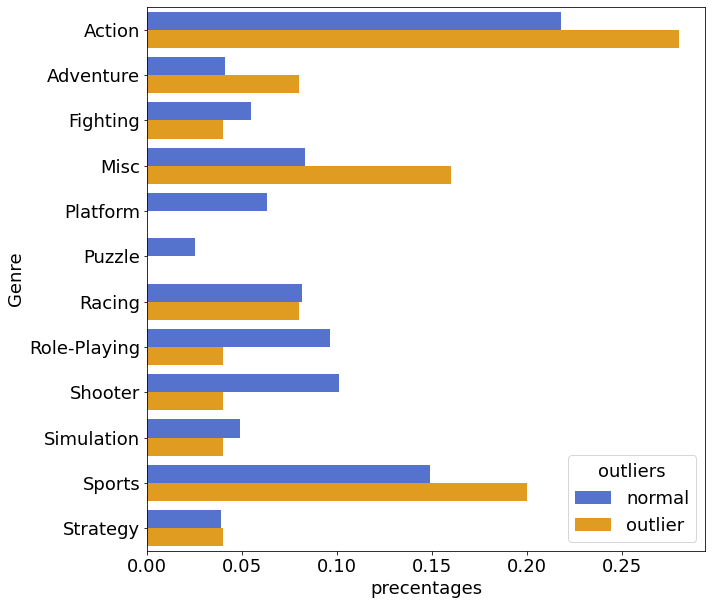

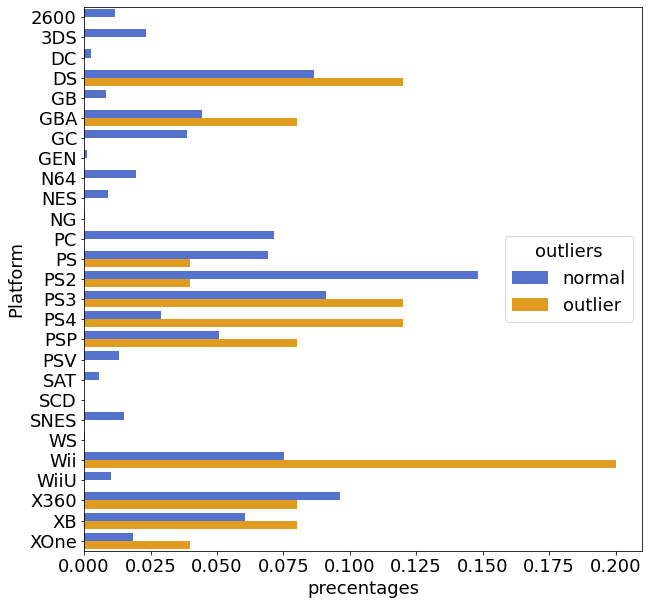

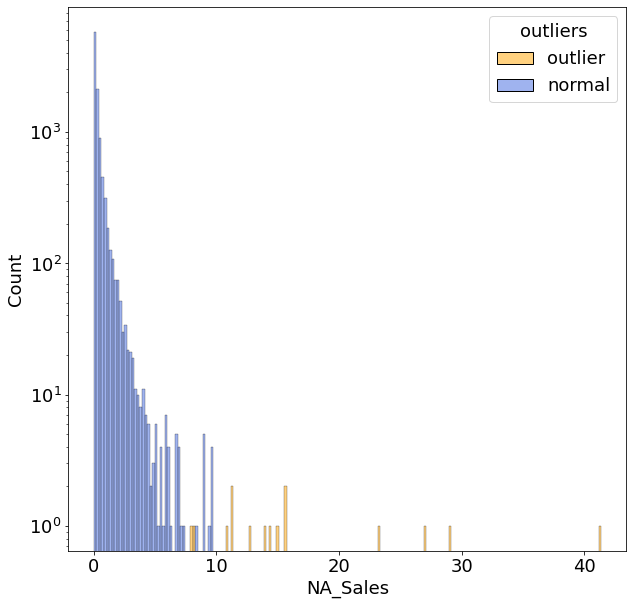

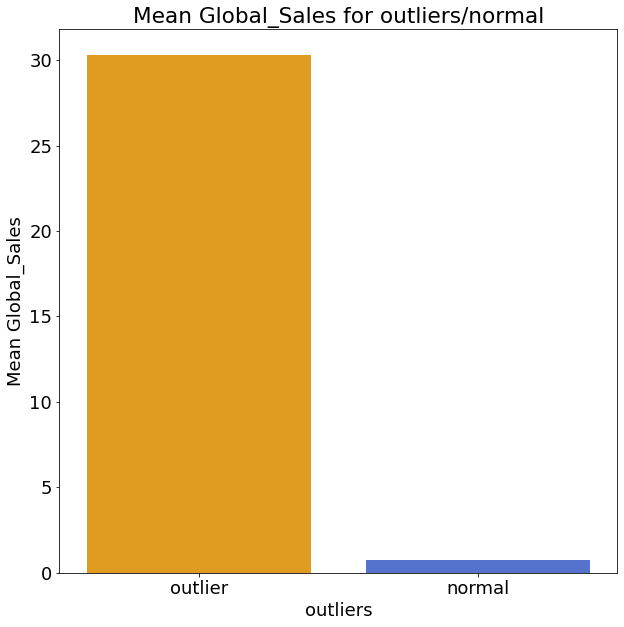

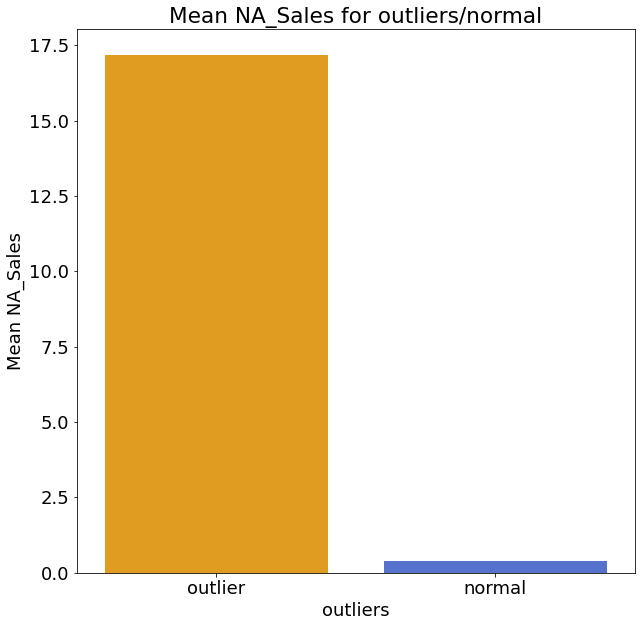

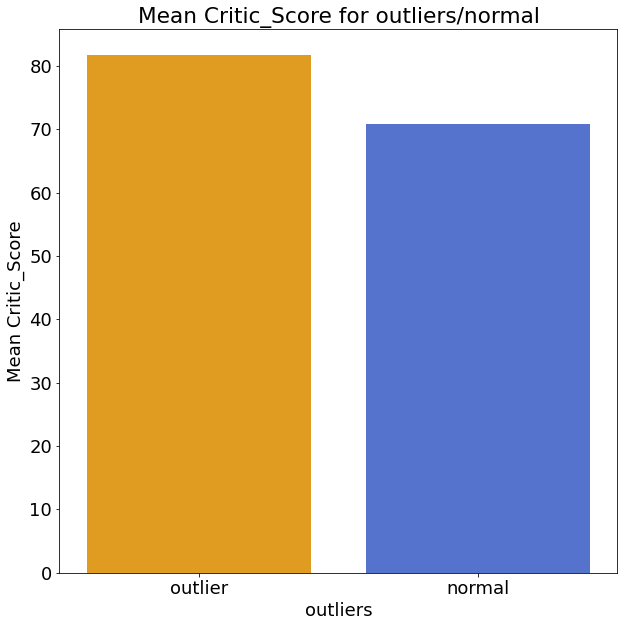

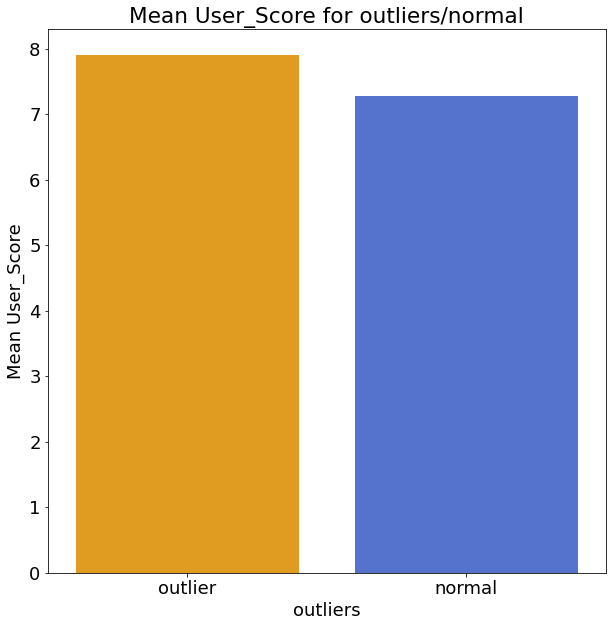

<Figure size 720x720 with 0 Axes>

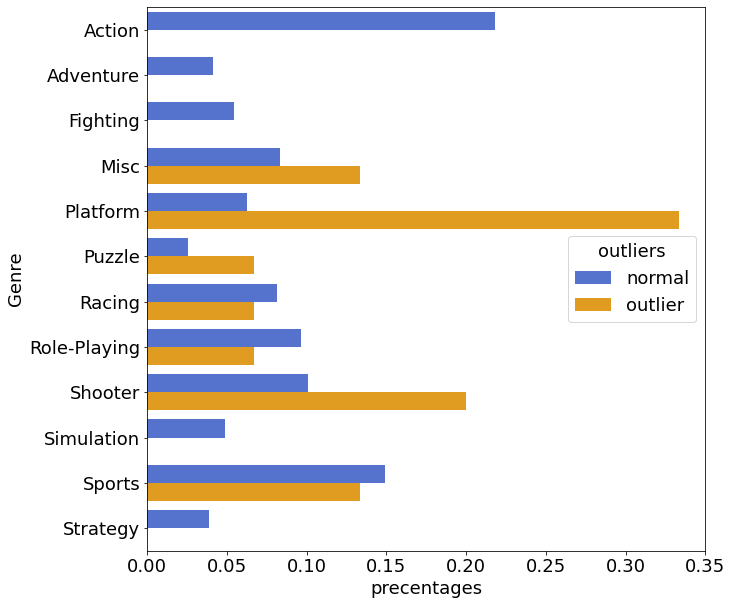

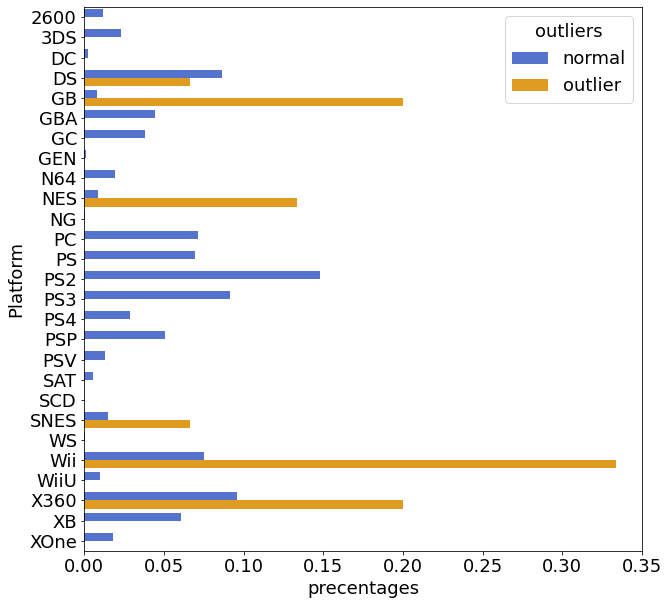

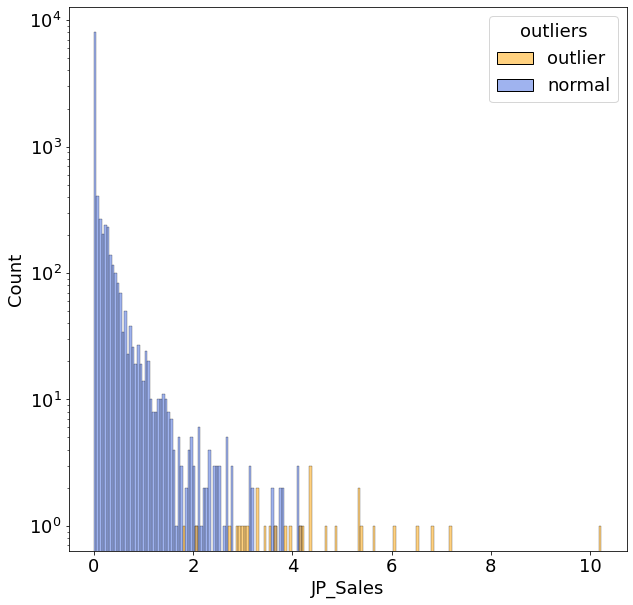

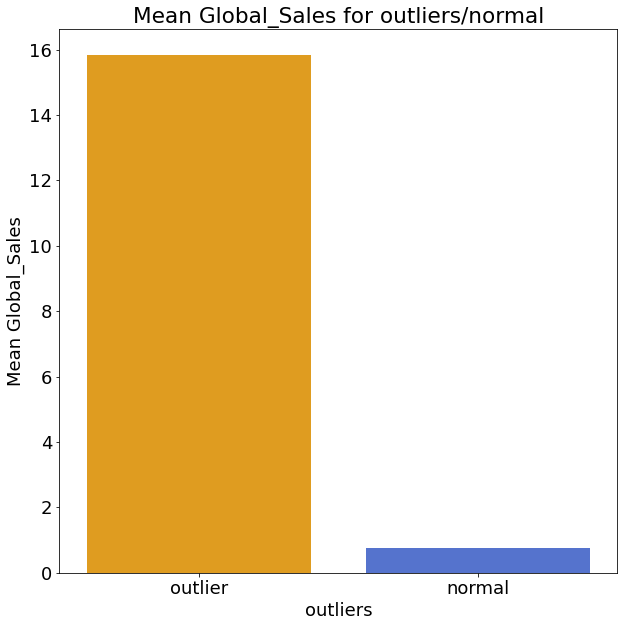

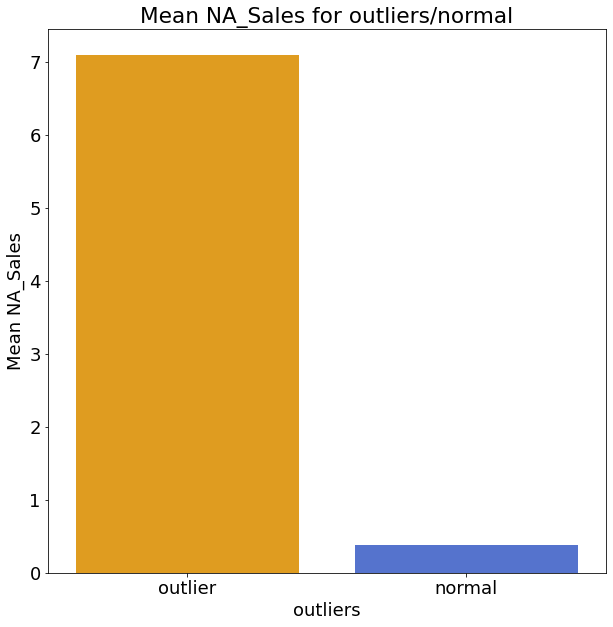

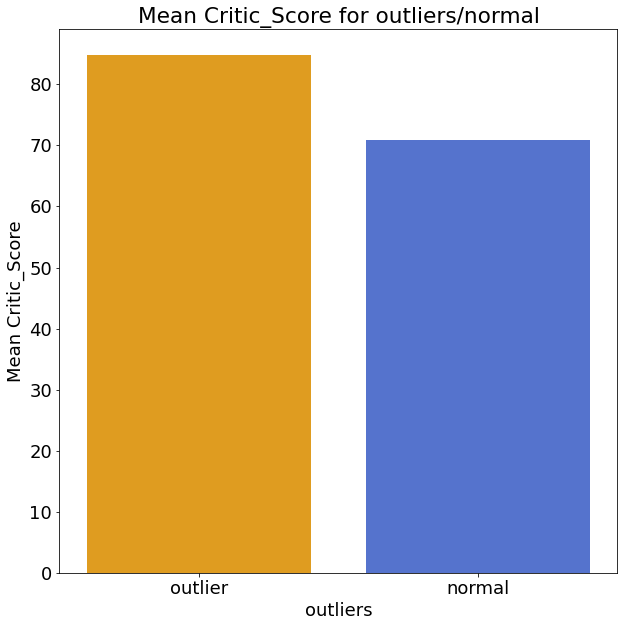

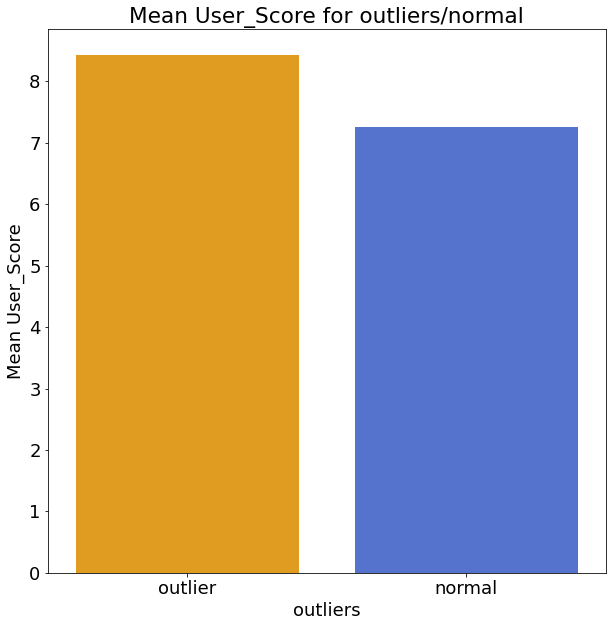

<Figure size 720x720 with 0 Axes>

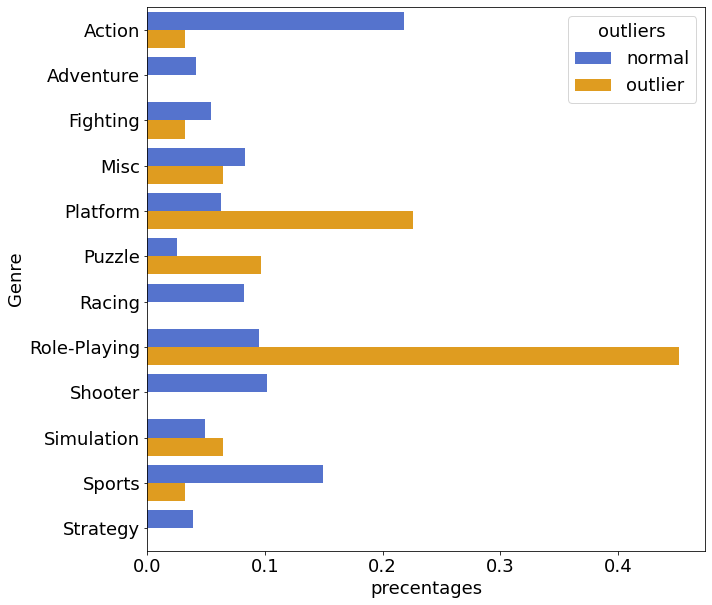

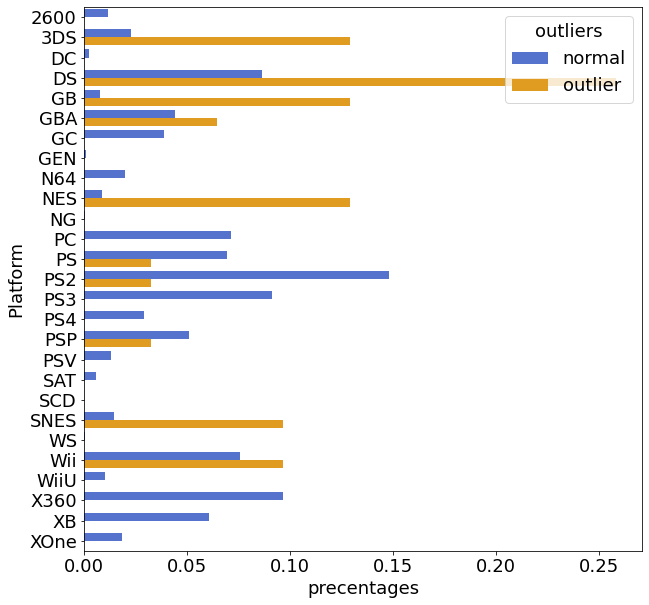

In [107]:
plt.rcParams.update({'font.size': 18})

def histogram_plot(outliers, non_outliers, x_lim=None, title=None, x_label=None, y_label=None):
    fig = plt.figure(figsize=(10, 5))
    ax = plt.subplot()
    non_outliers[title].plot(kind="hist", title=title, logy=True, bins=150)
    outliers[title].plot(kind="hist", logy=True, bins=150)
    if x_label:
        ax.set_xlabel(x_label)
    if y_label:
        ax.set_ylabel(y_label)
    if x_lim:
        ax.set_xlim(*x_lim)

def plot_means_for_given_column(data, column, y_range=None, colors=None):
    ax = sns.barplot(x="outliers", y=column, data=data, ci=None, palette=colors)
    if y_range:
        ax.set(ylim=y_range)
    ax.set(ylabel="Mean {}".format(column),
           title="Mean {} for outliers/normal".format(column))
    plt.show()

palette = ["orange", "royalblue"]
palete_inv = ["royalblue", "orange"]

# r_percentage = [0.0005, 0.001, 0.001, 0.001, 0.001, 0.001]
r_percentage = [0.0023, 0.002, 0.0024, 0.0015, 0.0030]
k_neighbours = [2, 2, 2, 2, 2, 2]
nearest_neighbours_columns = ["Global_Sales", "Critic_Score", "User_Score", "NA_Sales", "JP_Sales"]
outliers_for_each_column = []
for index, column in enumerate(nearest_neighbours_columns):
    outliers, non_outliers = find_outliers_in_single_column(data, column, k_neighbours[index], r_percentage[index])
    outliers_for_each_column.append(outliers)
    # histogram_plot(outliers, non_outliers, title=column)
    plt.figure()
    outliers["outliers"] = "outlier"
    non_outliers["outliers"] = "normal"
    result = pd.concat([outliers, non_outliers])
    ax = sns.histplot(result, x=column, hue="outliers", fill=True, palette=palette, log_scale=(False, True), bins=200)
    plt.figure()
    plot_means_for_given_column(result, "Global_Sales", colors=palette)
    plt.figure()
    plot_means_for_given_column(result, "NA_Sales", colors=palette)
    plt.figure()
    plot_means_for_given_column(result, "Critic_Score", colors=palette)
    plt.figure()
    plot_means_for_given_column(result, "User_Score", colors=palette)
    pretty_print_1d_outliers(outliers, column)
    plt.figure()
    # genres
    grouped_by_genre = result.groupby(["outliers", "Genre"]).size().reset_index(name='count')
    plt.figure()
    grouped_by_genre["precentages"] = grouped_by_genre["count"] / grouped_by_genre.groupby('outliers')["count"].transform('sum')
    sns.barplot(x="precentages", y="Genre", hue="outliers", data=grouped_by_genre, orient='h', palette=palete_inv)

    # platforms
    grouped_by_platform = result.groupby(["outliers", "Platform"]).size().reset_index(name='count')
    plt.figure()
    grouped_by_platform["precentages"] = grouped_by_platform["count"] / grouped_by_platform.groupby('outliers')["count"].transform('sum')
    sns.barplot(x="precentages", y="Platform", hue="outliers", data=grouped_by_platform, orient='h', palette=palete_inv)
